In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

Suppose we have an initial known 3rd order dependence:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Let's implement it as a python function and plot the graph.

In [2]:
def f(x):
    return 0.4 + 2 * x + 0.8 * x ** 2 + 0.5 * x ** 3

X = np.linspace(-5, 5, 100)
y = f(X)

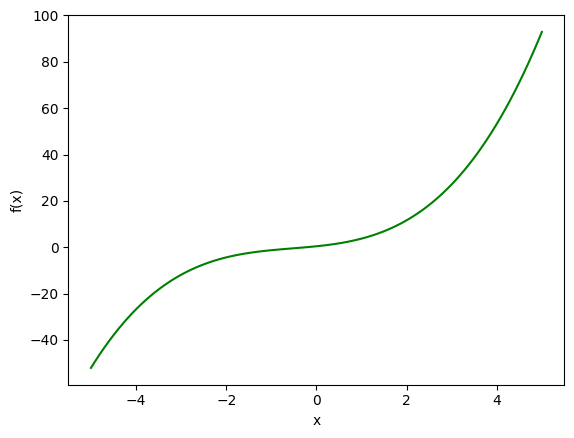

In [3]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g');

Now let's generate a dataset of ten random points obeying this dependence, with noise added, and plot it.

In [4]:
np.random.seed(18)
x_train = np.random.uniform(-5, 5, 10)
y_train = f(x_train) + 10 * np.random.randn(10)

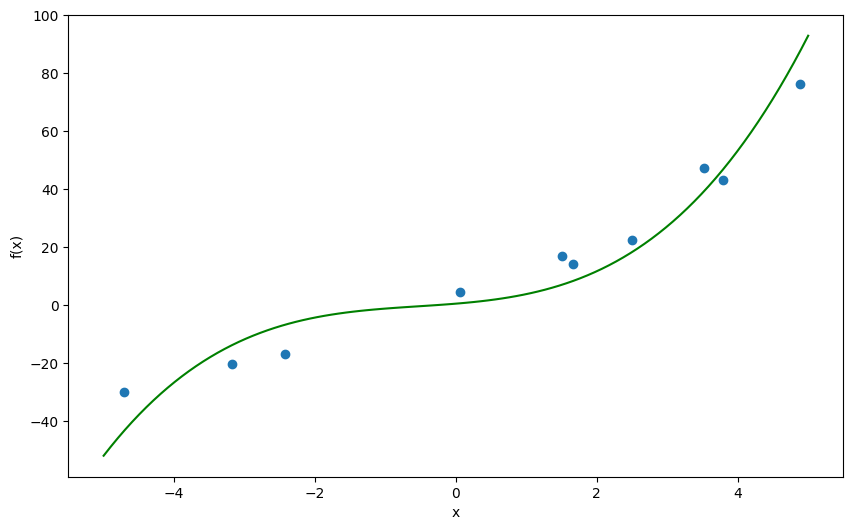

In [5]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');

In [6]:
np.random.seed(8)
x_test = np.random.uniform(-5, 5, 10)
x_test = np.sort(x_test)
y_test = f(x_test)

X_test = x_test.reshape(-1, 1)
X_train = x_train.reshape(-1, 1)

X_train.shape

(10, 1)

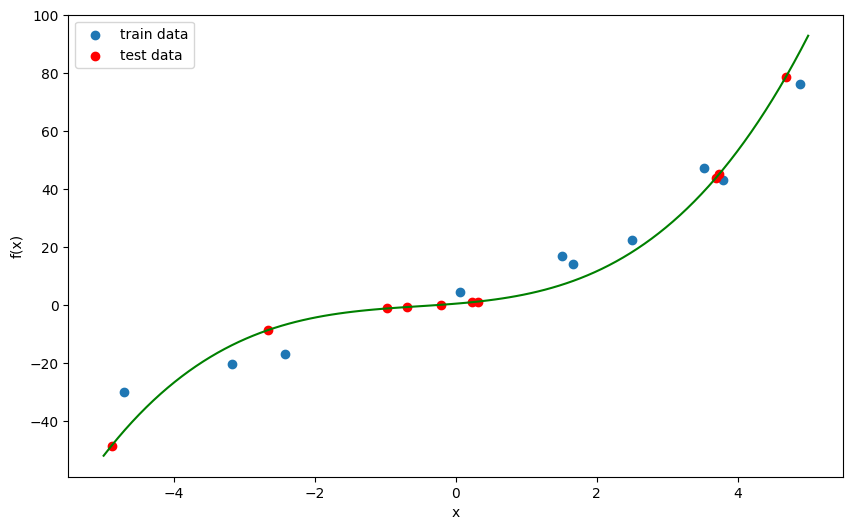

In [7]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend();

In [8]:
X_train

array([[ 1.50374242],
       [ 0.05453374],
       [ 3.78601471],
       [-3.18159775],
       [ 3.52233069],
       [ 2.50136286],
       [ 1.66101667],
       [ 4.87895448],
       [-2.43031577],
       [-4.71694075]])

In [9]:
X_train.shape

(10, 1)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False),
                     StandardScaler())

pipe.fit(X_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [11]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train

array([[ 0.24280024, -0.99361672, -0.09514354, -0.7935088 , -0.11704045,
        -0.65377906, -0.10644533, -0.5794457 , -0.1009462 , -0.53869339,
        -0.10204173],
       [-0.22897903, -1.2831795 , -0.15708267, -0.81953153, -0.1235608 ,
        -0.65623629, -0.10709649, -0.57968053, -0.1010101 , -0.53871595,
        -0.10204796],
       [ 0.98577727,  0.55438194,  0.83149569,  0.2261249 ,  0.5360912 ,
        -0.03034556,  0.3104915 , -0.2005174 ,  0.15876023, -0.30782378,
         0.05845399],
       [-1.28247793,  0.01438908, -0.74376567, -0.29804765, -0.40001917,
        -0.43580342, -0.23068805, -0.48537658, -0.15530466, -0.49816146,
        -0.1257384 ],
       [ 0.89993686,  0.30728335,  0.63899286, -0.03613738,  0.33622339,
        -0.25036765,  0.1448352 , -0.36686234,  0.03463997, -0.42654316,
        -0.02950314],
       [ 0.56756827, -0.4812904 ,  0.12801331, -0.62029612, -0.04052089,
        -0.60418099, -0.08415039, -0.56591537, -0.09477937, -0.53505703,
        -0.100

#Ridge(L2)

In [43]:
alphas = list(np.logspace(-7, 4, 10))
models = []
coefs = []

In [44]:
alphas

[1e-07,
 1.6681005372000591e-06,
 2.782559402207126e-05,
 0.0004641588833612782,
 0.007742636826811277,
 0.12915496650148853,
 2.1544346900318865,
 35.9381366380464,
 599.4842503189421,
 10000.0]

In [45]:
from sklearn.linear_model import Ridge, LinearRegression

for alpha in alphas:
    m_r = Ridge(alpha=alpha).fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(X_train, y_train))

In [46]:
models

[Ridge(alpha=1e-07),
 Ridge(alpha=1.6681005372000591e-06),
 Ridge(alpha=2.782559402207126e-05),
 Ridge(alpha=0.0004641588833612782),
 Ridge(alpha=0.007742636826811277),
 Ridge(alpha=0.12915496650148853),
 Ridge(alpha=2.1544346900318865),
 Ridge(alpha=35.9381366380464),
 Ridge(alpha=599.4842503189421),
 Ridge(alpha=10000.0),
 LinearRegression()]

In [47]:
len(models)

11

In [48]:
import pandas as pd
pd.DataFrame(np.array(coefs).T,columns=models[0:10])

,Ridge(alpha=1e-07),Ridge(alpha=1.6681005372000591e-06),Ridge(alpha=2.782559402207126e-05),Ridge(alpha=0.0004641588833612782),Ridge(alpha=0.007742636826811277),Ridge(alpha=0.12915496650148853),Ridge(alpha=2.1544346900318865),Ridge(alpha=35.9381366380464),Ridge(alpha=599.4842503189421),Ridge(alpha=10000.0)
0,149.823858,78.314106,45.628495,21.159736,22.032326,20.966020,14.975004,4.265911,0.473604,0.030361
1,-188.618802,-62.671528,-31.619310,-11.375613,-3.014191,1.264606,2.261850,0.887315,0.131114,0.008744
2,-638.458765,-339.254467,-145.449573,13.682680,10.671980,9.143002,7.985518,3.527178,0.459046,0.029824
3,1329.802310,382.467907,172.344409,50.394627,15.462585,3.766634,1.943973,0.791030,0.131334,0.008833
4,955.353613,742.721704,368.748409,16.094211,-1.592713,2.800751,3.779533,2.899884,0.422649,0.027685
5,-2215.007667,-431.554133,-139.848116,-24.349745,0.117943,1.777980,1.144502,0.669650,0.127274,0.008627
6,-159.539605,-335.210232,-204.138693,-44.374028,-5.605109,-0.043534,1.637313,2.532272,0.397525,0.026169
7,57.275861,-382.426263,-237.356823,-39.121867,-5.222284,0.333985,0.477902,0.593128,0.126500,0.008621
8,482.222947,-382.514572,-251.075559,-25.952672,-1.149865,-1.066616,0.553128,2.325327,0.382381,0.025248
9,1081.875571,510.871653,244.528285,29.297242,-1.146250,-0.225721,0.030289,0.564962,0.129650,0.008857


In [49]:
len(coefs)

10

In [50]:
coefs[0].shape

(11,)

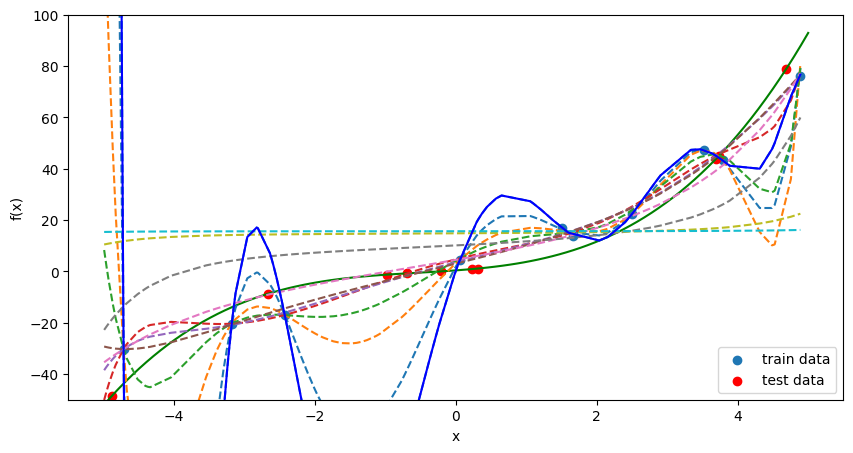

In [51]:
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [39]:
models[-1]

LinearRegression()

In [52]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_r2,test_r2
0,no,1.000000,-76.478993
1,0.0,0.999901,-18.170492
2,0.000002,0.999682,-0.349948
3,0.000028,0.998399,0.719186
4,0.000464,0.995018,0.956577
5,0.007743,0.993622,0.963986
6,0.129155,0.992731,0.954618
7,2.154435,0.970881,0.960356
8,35.938137,0.732147,0.720257
9,599.48425,0.142472,0.114558


Visualization of weights

In [53]:
np.vstack(coefs).T

array([[ 1.49823858e+02,  7.83141057e+01,  4.56284949e+01,
         2.11597363e+01,  2.20323261e+01,  2.09660195e+01,
         1.49750038e+01,  4.26591103e+00,  4.73603858e-01,
         3.03610593e-02],
       [-1.88618802e+02, -6.26715281e+01, -3.16193098e+01,
        -1.13756134e+01, -3.01419069e+00,  1.26460612e+00,
         2.26184976e+00,  8.87314879e-01,  1.31114101e-01,
         8.74394708e-03],
       [-6.38458765e+02, -3.39254467e+02, -1.45449573e+02,
         1.36826804e+01,  1.06719799e+01,  9.14300246e+00,
         7.98551751e+00,  3.52717770e+00,  4.59046049e-01,
         2.98237041e-02],
       [ 1.32980231e+03,  3.82467907e+02,  1.72344409e+02,
         5.03946268e+01,  1.54625848e+01,  3.76663401e+00,
         1.94397342e+00,  7.91030097e-01,  1.31334026e-01,
         8.83262366e-03],
       [ 9.55353613e+02,  7.42721704e+02,  3.68748409e+02,
         1.60942110e+01, -1.59271275e+00,  2.80075149e+00,
         3.77953349e+00,  2.89988418e+00,  4.22648749e-01,
         2.

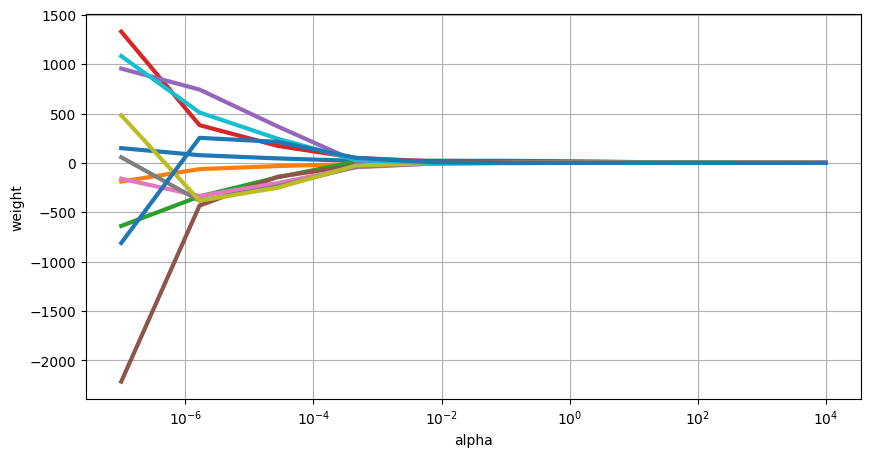

In [54]:
plt.figure(figsize=(10, 5))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

#Lasso(L1)

In [ ]:
alphas = list(np.logspace(-3, 2, 10))
models = []
coefs = []

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression

for alpha in alphas:
    m_r = Lasso(alpha=alpha).fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(X_train, y_train))

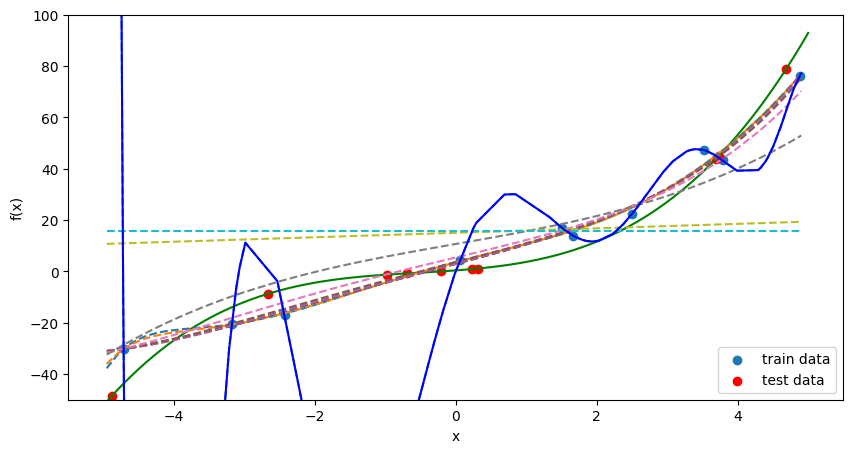

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_r2,test_r2
0,no,1.000000,-76.478993
1,0.001,0.993779,0.964088
2,0.003594,0.993632,0.962608
3,0.012915,0.993179,0.956604
4,0.046416,0.993016,0.954939
5,0.16681,0.992967,0.954717
6,0.599484,0.992329,0.953459
7,2.154435,0.984108,0.943561
8,7.742637,0.887044,0.847440
9,27.825594,0.154763,0.120156


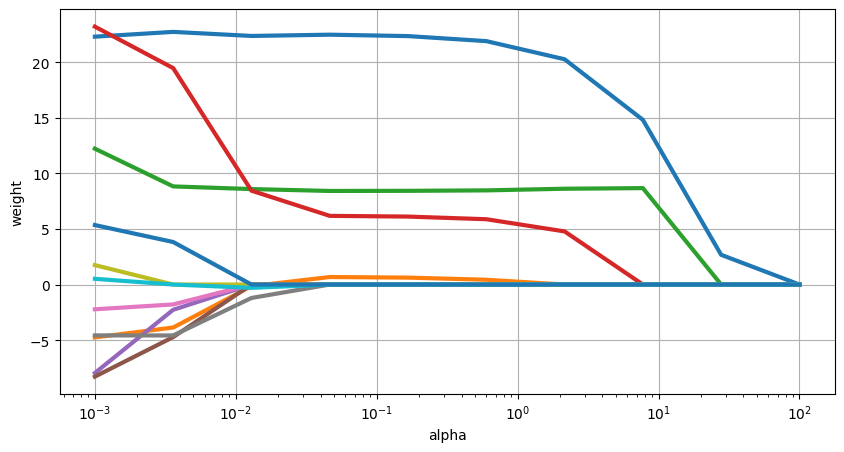

In [ ]:
plt.figure(figsize=(10, 5))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

#ElasticNet (L1+L2)

In [ ]:
alphas = list(np.logspace(-3, 5, 5))
models = []

In [ ]:
alphas

[0.001, 0.1, 10.0, 1000.0, 100000.0]

> Minimizes the objective function:<br>
$$\frac{1}{2 * n_{samples}} \cdot ||y - Xw||^2_2 + alpha * l1_{ratio} * ||w||_1 + 0.5 \cdot alpha * (1 - l1_{ratio}) * ||w||^2_2$$




> The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For
l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it
is an L1 penalty.  For 0 < l1_ratio < 1, the penalty is a
combination of L1 and L2.

In [ ]:
l1_ratio = list(np.linspace(0, 1, 5))
l1_ratio

[0.0, 0.25, 0.5, 0.75, 1.0]

In [ ]:
from sklearn.linear_model import ElasticNet, LinearRegression

for l1 in l1_ratio:
    for alpha in alphas:
        m_r = ElasticNet(max_iter=1000,
                         alpha=alpha,
                         l1_ratio=l1).fit(X_train, y_train)
        models.append(m_r)


models.append(LinearRegression().fit(X_train, y_train))

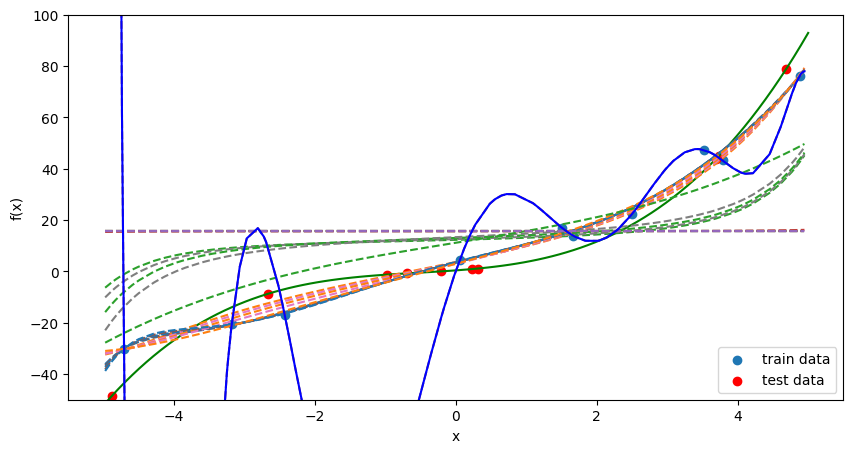

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'l1_ratio': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, l1 in enumerate(l1_ratio):
    for j, alpha in enumerate(alphas):
        alpha = alphas[j]
        l1 = l1_ratio[i]
        m = models[i+j]
        scores = scores.append(
            {
                'alpha': alpha,
                'l1_ratio': l1,
                'train_r2': m.score(X_train, y_train),
                'test_r2': m.score(X_test, y_test)
            }, ignore_index=True
        )


scores

,alpha,l1_ratio,train_r2,test_r2
0,no,no,1.000000,-76.478993
1,0.001,0.0,0.993524,0.962130
2,0.1,0.0,0.985673,0.962193
3,10.0,0.0,0.505892,0.474395
4,1000.0,0.0,0.009741,-0.010146
5,100000.0,0.0,0.000098,-0.019099
6,0.001,0.25,0.985673,0.962193
7,0.1,0.25,0.505892,0.474395
8,10.0,0.25,0.009741,-0.010146
9,1000.0,0.25,0.000098,-0.019099


In [ ]:
scores.sort_values(['test_r2', 'train_r2'], ascending=False)

,alpha,l1_ratio,train_r2,test_r2
10,100000.0,0.25,0.993581,0.962593
14,1000.0,0.5,0.993581,0.962593
18,10.0,0.75,0.993581,0.962593
22,0.1,1.0,0.993581,0.962593
2,0.1,0.0,0.985673,0.962193
6,0.001,0.25,0.985673,0.962193
1,0.001,0.0,0.993524,0.962130
15,100000.0,0.5,0.988146,0.961745
19,1000.0,0.75,0.988146,0.961745
23,10.0,1.0,0.988146,0.961745


#Real data

In [ ]:
import seaborn as sns;
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,99,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,32,68,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,32,78,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,28,24,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,23,136,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
35512,19,57,2002,3,225000.0,1800.0,3,0,4400.0,20,11250.000000
35513,6,84,2015,11,89000.0,1500.0,0,0,7000.0,7,12714.285714
35514,23,51,2016,10,50000.0,1950.0,0,1,29500.0,6,8333.333333
35515,22,10,2006,1,370000.0,2000.0,0,0,4000.0,16,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [ ]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  35517 non-null  int64  
 1   Distance              35517 non-null  float64
 2   Engine_capacity(cm3)  35517 non-null  float64
 3   Price(euro)           35517 non-null  float64
 4   km_year               35517 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.4 MB


,0,1,2,3
24856,0.90,0.189919,0.166667,0.632599
24857,0.42,0.283928,0.375000,0.187709
24858,0.68,0.229923,0.270833,0.269126
24859,0.70,0.204475,0.479167,0.254202
24860,0.82,0.132761,0.416667,0.264224


In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

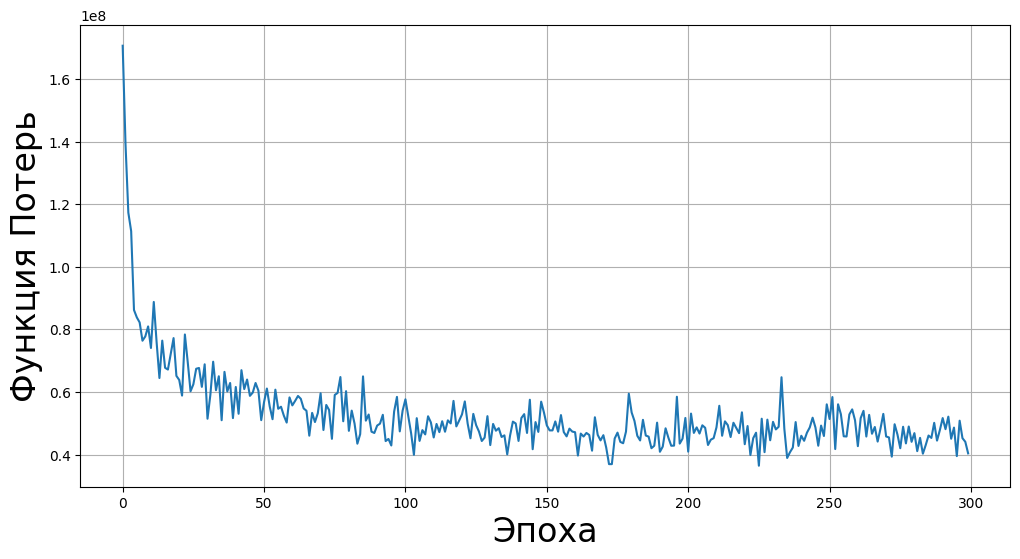

train R2: 0.4902; test R2: 0.4903


In [ ]:
regr = LinearRegression(learning_rate=0.5,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))


In [ ]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

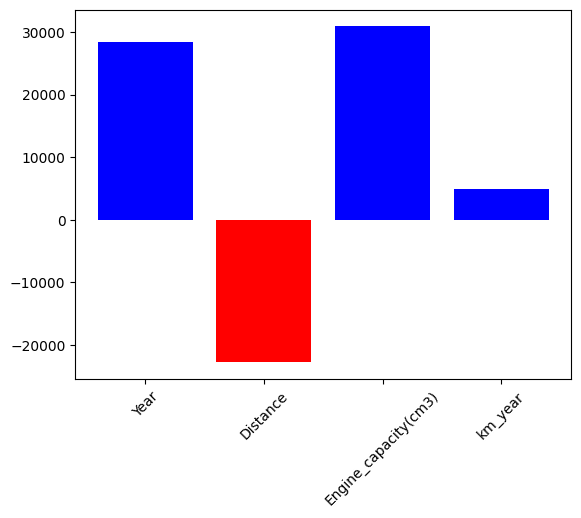

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)


It often happens that a normal gradient descent leads to overtraining of the model. Overtraining is a situation where the accuracy on the training data is significantly higher than on the test data.

In such cases, we can also say that the data is ill-conditioned - that is, any small changes with respect to the training sample will result in large changes in the model's response. In general, this would mean that the model gives a very large spread of results.

This variation can be reduced by using various regularization techniques. The point of using such techniques is to add an additional condition to the weight parameter update expression when training the model.

For example, a condition can be added to limit the sum of squares of the weight parameters. Such an assumption is called Tikhonov regression or ridge regression (and also L2 regularization).

Technically, such regularization corresponds to the assumption that the distribution of model results has the form of a normal distribution. Such an assumption is often acceptable and justified.
$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_2^2< \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j^2\to \min,
$$

The law of variation of weight parameters for this model can be written as:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i) + \frac{\lambda}{n}\sum_{j=1}^{p} W_j. $$

Let's write a new version of the regression. For this purpose, let's write a new class inheriting from the already created one and rewrite `loss` and `update` methods in it. Also note that the offset is not regularized !

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)


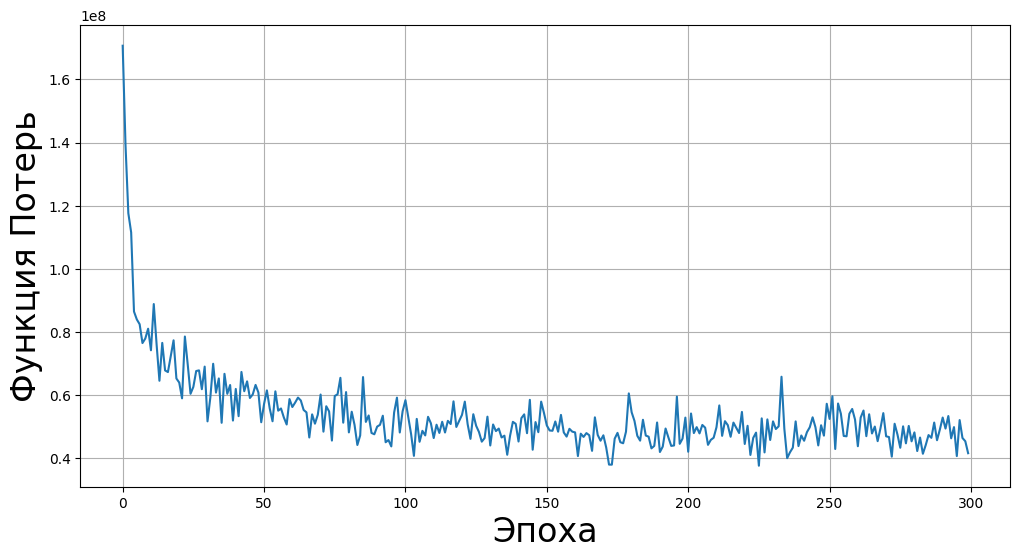

train R2: 0.4895; test R2: 0.4896


In [ ]:
regr = RidgeRegression(learning_rate=0.5,epochs=300,batch_size=3000, l2_penalty = 0.001)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

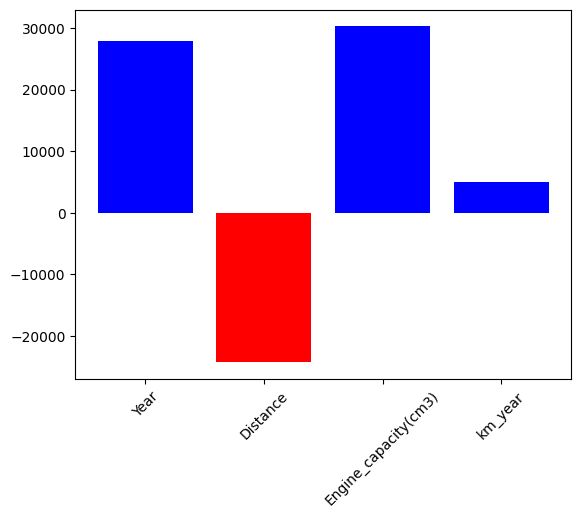

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

87321.8285685008

In some cases, when the data scatter is very large, L2 regularization may be useless or even harmful. The point is that in the loss function we take into account squared weights and large variations of weight parameters will lead to squared large variations in the loss function values. This situation is often unacceptable.

In such cases, more robust (robust methods) should be chosen. Robust methods may be less accurate but more stable. One of the most common robust methods is L1 regularization. In this case, the expression for the loss function can be written as follows:

$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_1^1 \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j\to \min,
$$

In [ ]:
class LassoRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        return np.square(yhat - y).mean() + l1_term

    #---------------------------------
    def update(self):
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

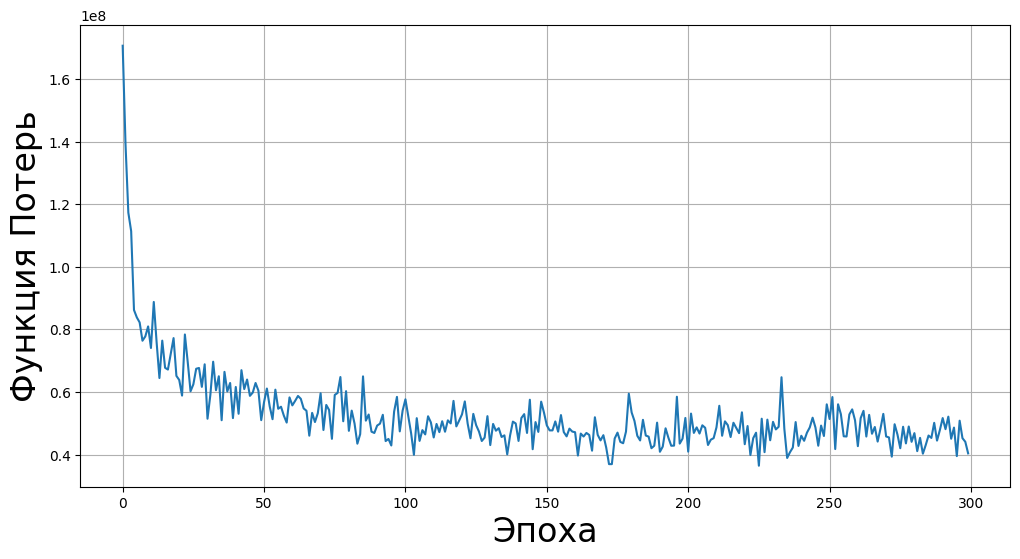

train R2: 0.4902; test R2: 0.4903


In [ ]:
regr = LassoRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

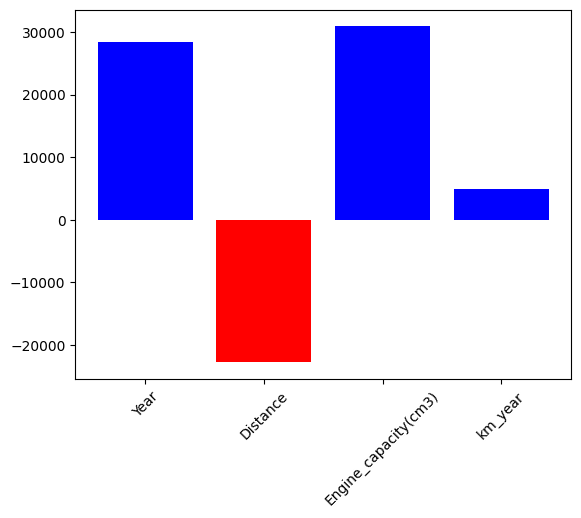

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)